## To Do ##

- handle distances consistently
- match RA and DEC of galaxy zoo to a100-sdss and to gswlc catalog
  - galaxy zoo 2, t04_spiral_a08_spiral_weighted_fraction - column to use for spiral probability
- split Table 2 into Table 2 and 3
- make skyplot a 3 panel plot, showing each survey relative to a100.
- We should add more text about the matches to WISE.  You know the most about this, so you should make sure that what we say is correct. 
- SFRs for galaxies w/out GALEX
- errors in tables

## Finished ##
- Figure for color-stellar mass for GSWLC in the same format as the others (Note from Adriana: Watch out for null values of -999 in GSWLC.)
- Figure for comparison of stellar masses in different catalogs
- Draft version of final catalog?
- Figure for specific star formation rate versus stellar mass for GSWLC compared with a100-GSWLC
- KS tests to compare histograms in color and stellar mass.
- Figure 1 needs an x-axis label
  - this was in the code, just cut off
  - adjusted bottom so it shows
- make sSFR vs color the right side of Fig 6
- The legends in some figures could be moved show the graphs better. 
  - switched them all to 'upper left'.  I think this works across the board.
- sky plots to show areal coverage of plots
```
We have a map comparing sky positions for a100 and GSWLC, but not for the other catalogs.  I think we wanted to make those also.  Could you do it?  (If you’re too busy, one of us could do it.)
```
- In Figure 4, the left panel should be color versus mass, like the others. (fixed, I think.)

https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
http://cxhernandez.com/tutorials/dataviz/2014/11/19/jointplot-d3.html

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from astropy.io import fits

In [3]:

tabledir = '/Users/rfinn/github/APPSS/tables/'
tabledir = '/home/rfinn/research/APPSS/tables/'

# To Generate Catalogs #

- the catalogs are created by **match_catalogs.py**


## Notes ##
- NSA abs mags are for H0=100 - do we correct for this when calculating Taylor stellar mass (should be H0=70)
- answer is yes, because we calculate our own absolute magnitudes using the internal extinction-corrected magnitudes and the distance that is in the a100 catalog.

### Ingesting GSWLC ###

- downloaded catalog gswlc-A2 (640,659 objects)
  - http://pages.iu.edu/~salims/gswlc/
  - unzip
```
gunzip GSWLC-A2.dat.gz 
```

  - created a header string (file doesn't have header) http://pages.iu.edu/~salims/gswlc/table2.pdf
```
# objide glxid plate mjd fiberid ra dec z chisq logmass e_logmass logsfr e_logsfr afuv e_afuv ab e_ab av e_av flag_sed uv_servey flag_uv flag_midir flag_mgs
```

  - read into topcat as an ascii file
- downloaded Adriana's catalog with SDSS photometry and errors 
  - https://drive.google.com/drive/folders/1P3ooZ5euqK8DvpsgT_2b5eOgtma6XT0-
  - Table_sdss_GSWLC_adurbala_AD.csv
  
- matched tables in topcat according to Adriana's directions
  - Sky match (RA, DEC), 0.5" error
     - RA,DEC in GSWLC catalog
     - radeg, decdeg in Adriana's catalog
  - found match for every galaxy - phew
  - output is gswlc-A2-sdssphot.fits (format just fits)

  
  
  

In [8]:
# I se the make_a100sdss=True in match_catalogs.py
%run match_catalogs.py

/home/rfinn/research/APPSS/tables//gswlc-A2-sdssphot.fits
INFO: Upgrading Table to masked Table. Use Table.filled() to convert to unmasked table. [astropy.table.table]
################################

MATCHING TO NSA 

################################
FULL CATALOGS, BEFORE MATCHING
total number in A100 =  31721
total number in NSA =  641409
AFTER MATCHING
total number in A100 =  31721
total number in NSA =  641571
number of unique galaxies =  650270
number of matches between A100 and NSA =  23022
number in A100 but not in NSA =  8699
number in NSA but not in A100 =  618549

OVERLAP VOLUME, BEFORE MATCHING
total number in A100 =  15581
total number in NSA =  42999

OVERLAP VOLUME, AFTER MATCHING
total number in A100 =  15581
total number in NSA =  43094
number of unique galaxies =  45033
number of matches between A100 and NSA =  13642
number in A100 but not in NSA =  1939
number in NSA but not in A100 =  29452
################################

MATCHING TO GSWLC-A2 

###################

<Figure size 432x288 with 0 Axes>

# Paper Plots #

- the code to generate paper plots is in **a100sdss.py**

In [9]:
%run a100sdss.py

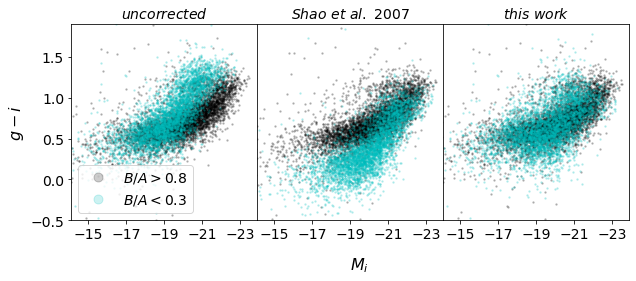

In [10]:
p.figure1()

/home/rfinn/github/APPSS/a100sdss.py:71: RuntimeWarning: invalid value encountered in greater_equal
  keepflag2 = (x2 >= xmin) & (x2 <= xmax) & (y2 >= ymin) & (y2 <= ymax)
/home/rfinn/github/APPSS/a100sdss.py:71: RuntimeWarning: invalid value encountered in less_equal
  keepflag2 = (x2 >= xmin) & (x2 <= xmax) & (y2 >= ymin) & (y2 <= ymax)
/home/rfinn/github/APPSS/a100sdss.py:93: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour((H.T), levels=ncontour_levels, extent = extent, zorder=1,colors=color2, label='__nolegend__')
/home/rfinn/github/APPSS/a100sdss.py:110: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  t = plt.hist(x1, normed=True, bins=nhistbin,color='k',histtype='step',lw=1.5, label=name1)
/home/rfinn/github/APPSS/a100sdss.py:111: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instea

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.07
p-value = 1.86e-34 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.33
p-value = 0.00e+00 (prob that samples are from same distribution)


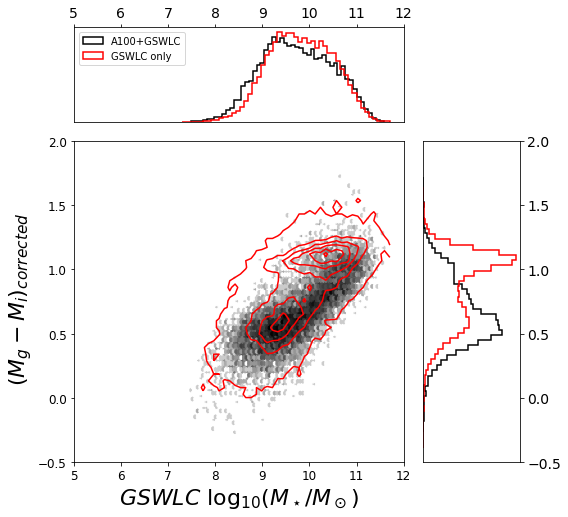

In [10]:
t = p.figa_gswlc()

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.07
p-value = 1.72e-34 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.28
p-value = 0.00e+00 (prob that samples are from same distribution)


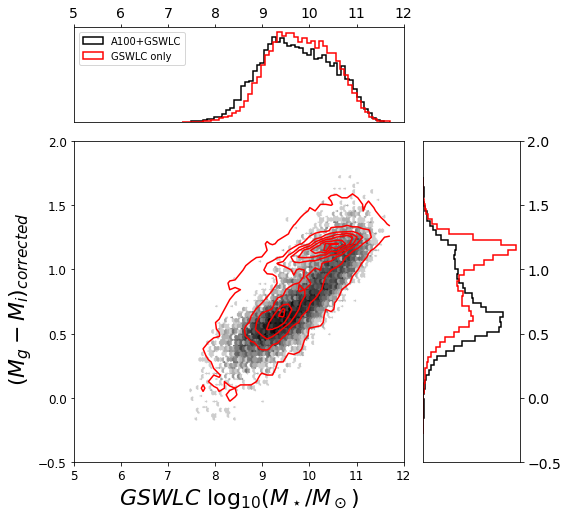

In [57]:
t = p.figa_gswlc()

4300 4300
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.38
p-value = 0.00e+00 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.21
p-value = 1.06e-116 (prob that samples are from same distribution)


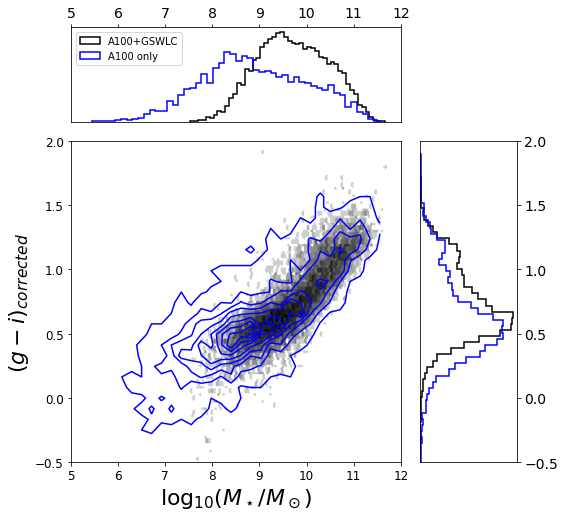

In [58]:
t = p.figb_gswlc()

number of galaxies in NSA + A100 sample =  13119
28318 28318
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.06
p-value = 4.90e-33 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.27
p-value = 0.00e+00 (prob that samples are from same distribution)


array([ True,  True,  True, ..., False, False, False])

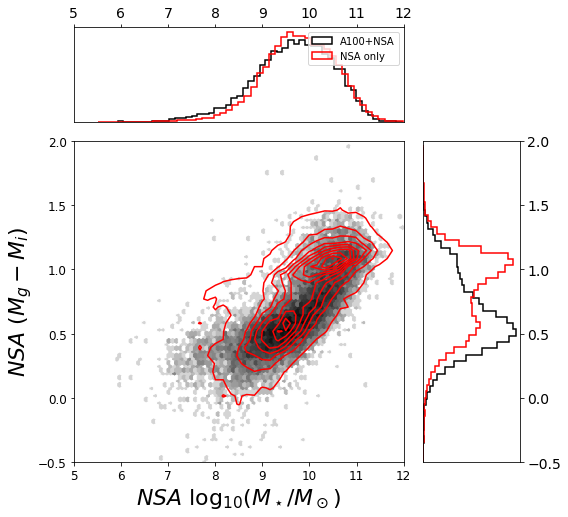

In [59]:
p.figa_nsa()


1427 1427
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.45
p-value = 1.76e-223 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.34
p-value = 5.86e-127 (prob that samples are from same distribution)


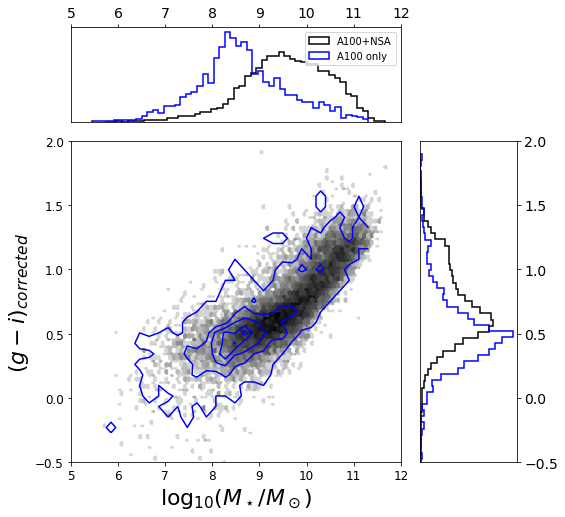

In [60]:
p.figb_nsa()

number with both =  537
number with S4G only =  64
64 64
[  1.  10.  19.  28.  37.  46.  55.  64.  73.  82.  91. 100.]
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.26
p-value = 1.65e-02 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.68
p-value = 6.66e-16 (prob that samples are from same distribution)


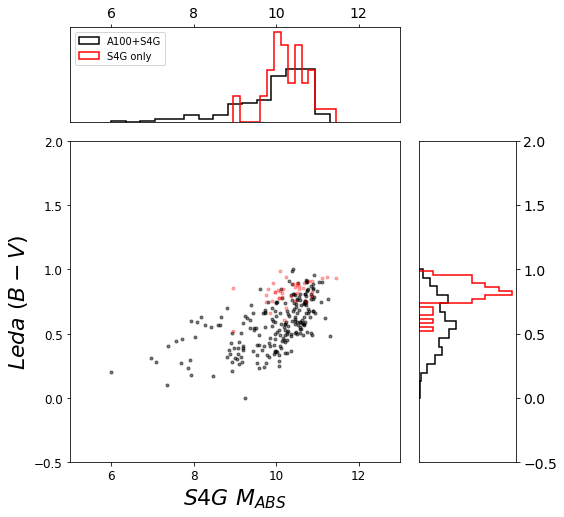

In [61]:
p.figa_s4g()


[  2.  20.  38.  56.  74.  92. 110. 128. 146. 164. 182. 200.]
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.15
p-value = 7.50e-09 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.18
p-value = 5.74e-13 (prob that samples are from same distribution)


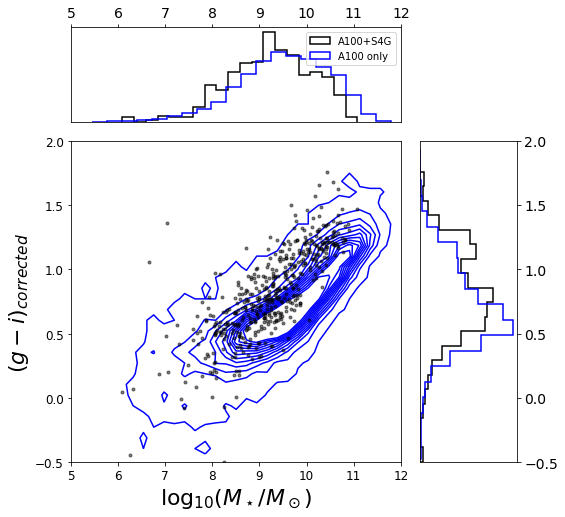

In [62]:
p.figb_s4g()

## Comparison of Stellar Mass Estimates ##

### Taylor stellar mass ###
- need to review what distances we are using for each dataset

<Figure size 432x288 with 0 Axes>

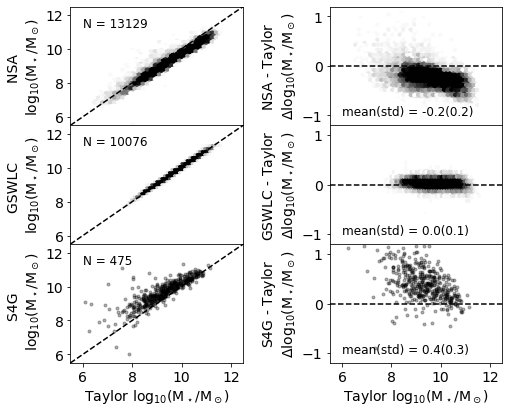

In [49]:
%run a100sdss.py
p.mstar()

## sSFR ##

- plot sSFR vs sellar mass for S4G+A100 sample vs A100

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.07
p-value = 1.77e-34 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.24
p-value = 0.00e+00 (prob that samples are from same distribution)


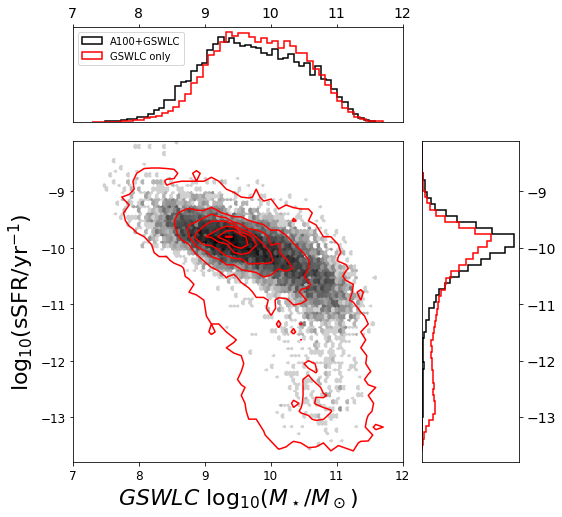

In [65]:
t = p.ssfrmstar()

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.28
p-value = 0.00e+00 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.24
p-value = 0.00e+00 (prob that samples are from same distribution)


<Figure size 432x288 with 0 Axes>

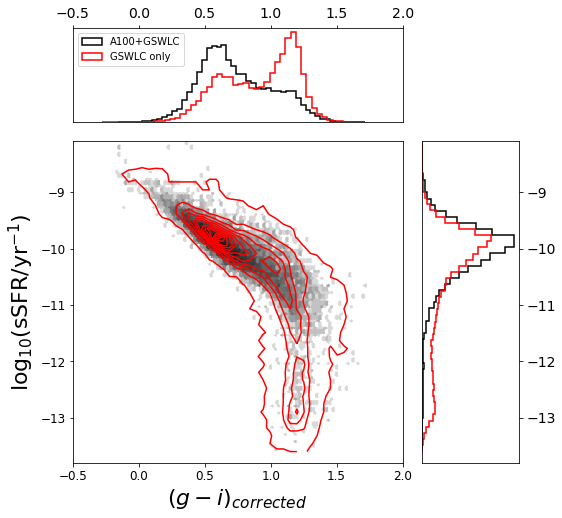

In [66]:
%run a100sdss.py
t = p.ssfrcolor()

## sSFR vs HI Frac ##



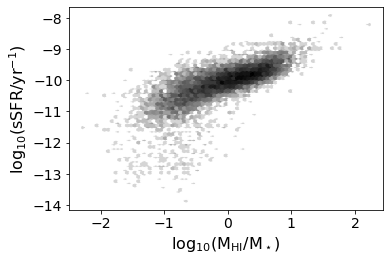

In [67]:
t = p.ssfrHIfrac()

# Skyplot showing distribution of various surveys #

http://learn.astropy.org/plot-catalog.html

* I want to make a figure that shows the sky coverage of the surveys that we are comparing

```
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
```

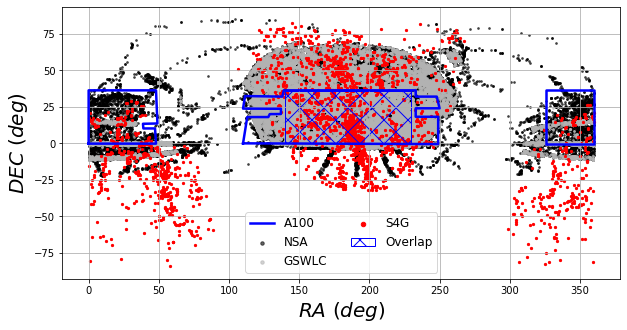

In [4]:
%run ~/github/APPSS/skyplot.py

got here
got here


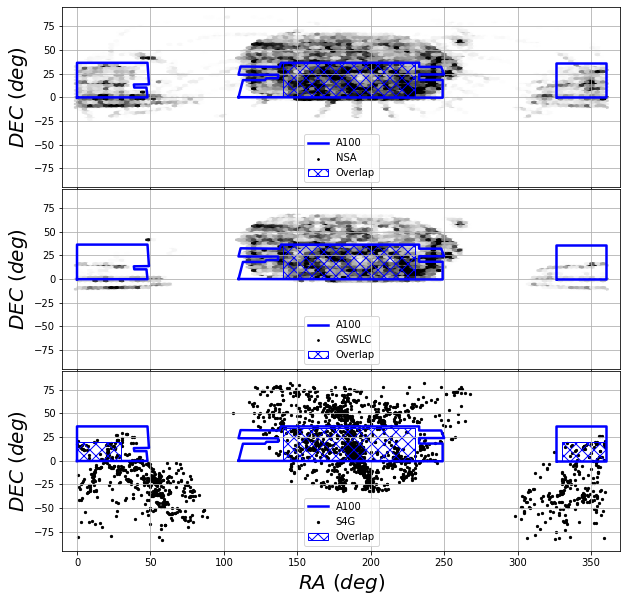

In [39]:
%run ~/github/APPSS/skyplot.py

# Incorporating unWISE #

Dustin Lang provided catalog of matched unWISE sources

- 219 galaxies are matched to multiple unWISE sources
- 1 galaxies is matched to 3 sources (the rest are matched to 2)

I matched the Lang catalog to a100-sdss in match_catalogs.




In [13]:
%run ~/github/APPSS/match_catalogs.py

/home/rfinn/research/APPSS/tables//gswlc-A2-sdssphot.fits
INFO: Upgrading Table to masked Table. Use Table.filled() to convert to unmasked table. [astropy.table.table]
################################

MATCHING TO NSA 

################################
FULL CATALOGS, BEFORE MATCHING
total number in A100 =  31721
total number in NSA =  641409
AFTER MATCHING
total number in A100 =  31721
total number in NSA =  641571
number of unique galaxies =  650270
number of matches between A100 and NSA =  23022
number in A100 but not in NSA =  8699
number in NSA but not in A100 =  618549

OVERLAP VOLUME, BEFORE MATCHING
total number in A100 =  15581
total number in NSA =  42999

OVERLAP VOLUME, AFTER MATCHING
total number in A100 =  15581
total number in NSA =  43094
number of unique galaxies =  45033
number of matches between A100 and NSA =  13642
number in A100 but not in NSA =  1939
number in NSA but not in A100 =  29452
################################

MATCHING TO GSWLC-A2 

###################

In [295]:
cat = fits.getdata(tabledir+'/a100-sdss-wise.fits')

# Show distribution of distances between ALFALFA and unWISE position #

I thought we were using a 1 arcsec search radius, but might not be the case.

As the figure below shows, a handful (maybe 4?) of matches are more distant that 1 arcsec.

max separation =  42612.55452697217
number with offset < 1 arcsec =  18783
number with offset < 10 arcsec =  29418
total number =  31721


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


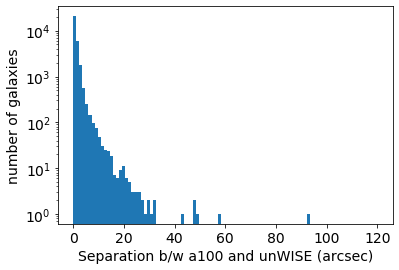

In [309]:
d = np.sqrt((cat['ra_2']-cat['RAdeg_Use'])**2 + (cat['dec_2']-cat['DECdeg_Use'])**2)*3600
flag = cat['finn_index'] > 0
plt.figure()
mybins = np.linspace(0,120,100)
t = plt.hist(d[flag],bins=mybins)
plt.gca().set_yscale('log')
plt.xlabel('Separation b/w a100 and unWISE (arcsec)')
plt.ylabel('number of galaxies')
print('max separation = ',max(d[flag]))
print('number with offset < 1 arcsec = ',sum(d < 1))
print('number with offset < 10 arcsec = ',sum(d < 10))
print('total number = ',len(d))

In [308]:
print(len(cat))

31721


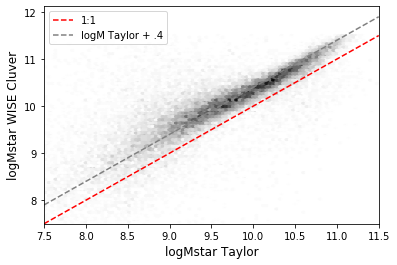

In [7]:
plt.figure(figsize=(6,4))
w1snr = np.abs(cat['w1_nanomaggies']*np.sqrt(cat['w1_nanomaggies_ivar']))
flag = w1snr > 5
x = cat['logMstarTaylor']
y = cat['logMstarCluver']
#plt.plot(x[flag],y[flag],'k.')
xmin=7.5
xmax=11.5
plt.hexbin(x[flag],y[flag],extent=[xmin,xmax,xmin,xmax],cmap='gray_r')
plt.xlabel('logMstar Taylor',fontsize=12)
plt.ylabel('logMstar WISE Cluver',fontsize=12)
xl = np.linspace(xmin,xmax,100)
plt.plot(xl,xl,'r--',label='1:1')
plt.plot(xl,xl+.4,'r--',c='.5',label='logM Taylor + .4')
plt.legend()
plt.savefig('WISE-Cluver-vs-Taylor.png')

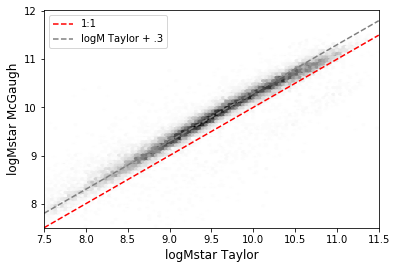

In [8]:
plt.figure(figsize=(6,4))
w1snr = np.abs(cat['w1_nanomaggies']*np.sqrt(cat['w1_nanomaggies_ivar']))
flag = w1snr > 5
x = cat['logMstarTaylor']
y = cat['logMstarMcGaugh']
#plt.plot(x[flag],y[flag],'k.')
xmin=7.5
xmax=11.5
plt.hexbin(x[flag],y[flag],extent=[xmin,xmax,xmin,xmax],cmap='gray_r')
plt.xlabel('logMstar Taylor',fontsize=12)
plt.ylabel('logMstar McGaugh',fontsize=12)
xl = np.linspace(xmin,xmax,100)
plt.plot(xl,xl,'r--',label='1:1')
plt.plot(xl,xl+.3,'r--',c='.5',label='logM Taylor + .3')
plt.legend()
plt.savefig('WISE-McGaugh-vs-Taylor.png')

## Compare unWISE stellar masses with GSWLC ##

just to see if we find the same 0.3 dex offset


This is definitely not the same offset.  McGaugh+ is closer to GSWLC values.  This adds to my confusion.

<Figure size 432x288 with 0 Axes>

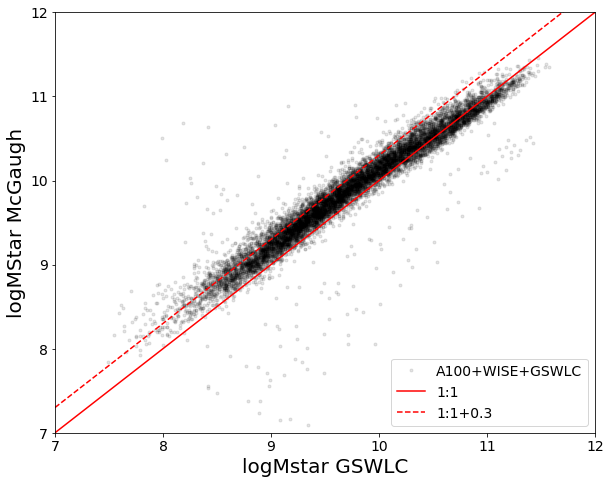

In [38]:
%run ~/github/APPSS/a100sdss.py
p.wise_gsw_mstar()

Stellar masses agree fairly well with GSWLC.  less of an offset than when comparing with Taylor+11 stellar mass.

## Comparing WISE SFR with GSWLC ##

<Figure size 432x288 with 0 Axes>

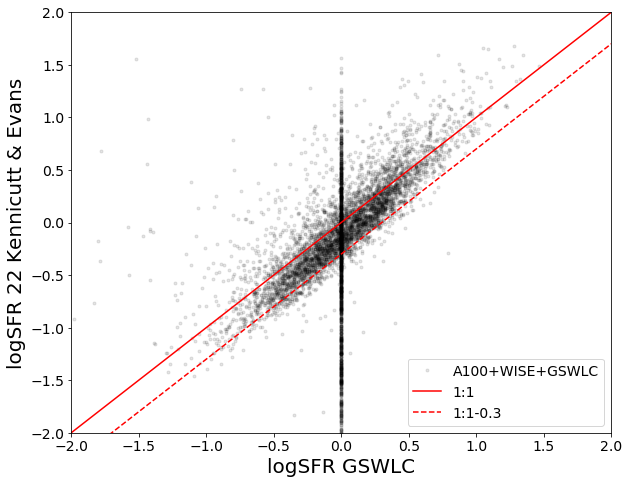

In [37]:
%run ~/github/APPSS/a100sdss.py
p.wise_gsw_sfr()

In [33]:
p.a100gsw.columns

ColDefs(
    name = 'AGC'; format = 'K'; null = 999999
    name = 'Name'; format = '8A'
    name = 'OrigSrcName'; format = '26A'
    name = 'HISrcName'; format = '17A'
    name = 'RAdeg_HI'; format = 'D'
    name = 'DECdeg_HI'; format = 'D'
    name = 'RAdeg_OC'; format = 'D'
    name = 'DECdeg_OC'; format = 'D'
    name = 'RAdeg_Use'; format = 'D'
    name = 'DECdeg_Use'; format = 'D'
    name = 'Vhelio'; format = 'K'; null = 999999
    name = 'sigV'; format = 'K'; null = 999999
    name = 'W50'; format = 'K'; null = 999999
    name = 'sigWtot'; format = 'K'; null = 999999
    name = 'sigWstat'; format = 'K'; null = 999999
    name = 'W20'; format = 'K'; null = 999999
    name = 'HIflux'; format = 'D'
    name = 'sigflux'; format = 'D'
    name = 'SNR'; format = 'D'
    name = 'RMS'; format = 'D'
    name = 'Dist_1'; format = 'D'
    name = 'sigdist'; format = 'D'
    name = 'logMH'; format = 'D'
    name = 'siglogMH'; format = 'D'
    name = 'HIcode'; format = 'K'; null = 999999
    

number of WISE detections =  21815


Text(0.2, 1, 'AGN')

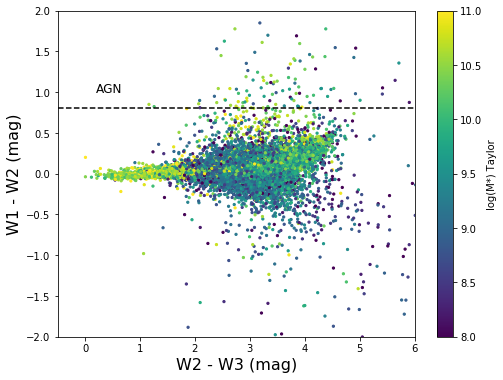

In [9]:
plt.figure(figsize=(8,6))
w3snr = np.abs(cat['w3_nanomaggies']*np.sqrt(cat['w3_nanomaggies_ivar']))
flag = (cat['w1_nanomaggies'] > 0) & (cat['w2_nanomaggies'] > 0) & (cat['w3_nanomaggies'] > 0) #& (cat['w4_nanomaggies'] > 0)
flag = w3snr > 3
print('number of WISE detections = ', sum(flag))
x = cat['w2_mag'] - cat['w3_mag']
y = cat['w1_mag'] - cat['w2_mag']
plt.scatter(x[flag],y[flag],c = cat['logMstarTaylor'][flag],s=5,vmin=8,vmax=11)
plt.axhline(y=.8,ls='--',color='k')
plt.colorbar(label='log(M*) Taylor')
plt.xlabel('W2 - W3 (mag)',fontsize=16)
plt.ylabel('W1 - W2 (mag)',fontsize=16)
plt.axis([-.5,6,-2,2])
plt.text(.2,1,'AGN',fontsize=12)

In [10]:
unique, counts = np.unique(cat['AGC'],return_counts=True)
print('number of AGC with multiple unWISE matches = ',sum(counts > 1))
print('')
print('AGC number of sources with multiple unWISE matches = ')
print(unique[counts > 1])

number of AGC with multiple unWISE matches =  219

AGC number of sources with multiple unWISE matches = 
[   231    433    669    852   1159   1226   1276   1553   2441   4034
   4548   4655   5020   5078   5431   5522   5844   5898   6195   6300
   6841   7113   7170   7547   7597   8165   9180   9266   9738   9991
  12110  12300  12340  12497  12612  12624 100352 101194 101833 101962
 101966 102797 102892 103006 105057 105414 110112 110465 111812 112459
 113509 113918 113922 113929 114496 114730 115281 115993 121130 121457
 122701 122811 123940 124091 132368 171688 171869 172251 172836 181913
 181925 182630 182865 184611 188742 188842 188861 188964 188994 190347
 192673 193780 193866 198484 198565 200878 202240 203860 203874 205138
 208559 208867 211006 211174 212162 213175 213312 214062 214730 215218
 216597 217497 220432 220616 220863 220865 221514 222214 222671 224145
 224236 224405 226004 226049 226606 226914 227962 229200 231904 231991
 232151 232158 232162 232461 232643 233386 

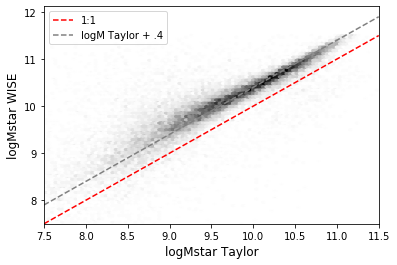

In [8]:
plt.figure(figsize=(6,4))
w1snr = np.abs(cat['w1_nanomaggies']*np.sqrt(cat['w1_nanomaggies_ivar']))
flag = w1snr > 5
x = cat['logMstarTaylor']
y = cat['logMstarWise']
#plt.plot(x[flag],y[flag],'k.')
xmin=7.5
xmax=11.5
plt.hexbin(x[flag],y[flag],extent=[xmin,xmax,xmin,xmax],cmap='gray_r')
plt.xlabel('logMstar Taylor',fontsize=12)
plt.ylabel('logMstar WISE',fontsize=12)
xl = np.linspace(xmin,xmax,100)
plt.plot(xl,xl,'r--',label='1:1')
plt.plot(xl,xl+.4,'r--',c='.5',label='logM Taylor + .4')
plt.legend()


In [9]:
print(10.**.4)
print(1/.7**2)

2.51188643150958
2.0408163265306127


* WISE stellar masses are 0.4 dex (or a factor of 2.5) larger than Taylor stellar mass we calculate from SDSS colors.
* is my solar luminosity off by a magnitude?





Text(0, 0.5, 'logSFR W3')

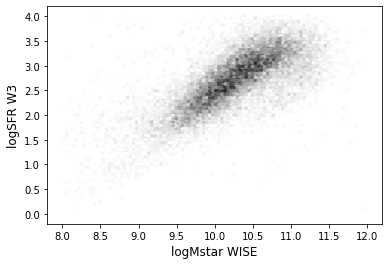

In [10]:
plt.figure(figsize=(6,4))
w3snr = np.abs(cat['w3_nanomaggies']*np.sqrt(cat['w3_nanomaggies_ivar']))
flag = (w1snr > 5) & (w3snr > 5)
y = cat['logSFR12']
x = cat['logMstarWise']
#plt.plot(x[flag],y[flag],'k.')
plt.hexbin(x[flag],y[flag],extent=[8,12,0,4],cmap='gray_r')
plt.xlabel('logMstar WISE',fontsize=12)
plt.ylabel('logSFR W3',fontsize=12)
#xl = np.linspace(5,12,100)
#plt.plot(xl,xl,'r--')

In [4]:
#sSFR vs Mstar
plt.figure(figsize=(6,4))
w3snr = np.abs(cat['w3_nanomaggies']*np.sqrt(cat['w3_nanomaggies_ivar']))
flag = (w1snr > 5) & (w3snr > 5)
y = cat['logSFR12']
x = cat['logMstarWise']
y = y-x
#plt.plot(x[flag],y[flag],'k.')
#plt.hexbin(x[flag],y[flag],extent=[8,12,0,4],cmap='gray_r')
plt.hexbin(x[flag],y[flag],extent=[8,12,-10,-6],cmap='gray_r')
plt.xlabel('logMstar WISE',fontsize=12)
plt.ylabel('log sSFR W3',fontsize=12)
#xl = np.linspace(5,12,100)
#plt.plot(xl,xl,'r--')

NameError: name 'cat' is not defined

<Figure size 432x288 with 0 Axes>

# Alternative version for one dataset only #

### Plot g-i corrected vs stellar mass ###

In [ ]:
# from my original plot
# central panel
x1 = agc['LogMstarTaylor'][keepagc]
y1 = agc['gmi_corrected'][keepagc]
x2 = nsa_logstellarmassTaylor[keepnsa]
y2 = nsa_gi[keepnsa]
colormass(x1,y1,x2,y2,'colormass-myversion.png')

Text(336.971,0.5,'$(g-i)_{corrected} $')

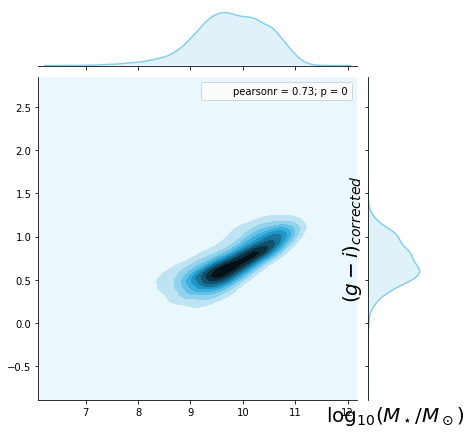

In [217]:
sns.jointplot(x=agc['LogMstarTaylor'][keepagc], y=agc['gmi_corrected'][keepagc], kind='kde', color="skyblue")
plt.xlabel('$\log_{10}(M_\star/M_\odot) $',fontsize=20)
plt.ylabel('$(g-i)_{corrected} $',fontsize=20)

# Looking at Effect of no UV on SFR #

we have wise for a good sample of galaxies

but SFR from IR is not reliable for low-mass galaxies.

In [258]:
%run ~/github/APPSS/a100sdss.py

/home/rfinn/github/APPSS/a100sdss.py:484: RuntimeWarning: invalid value encountered in greater
  flag = (self.a100nsa.finn_index != 999999) & self.nsaFlag & (self.a100nsa.w4_nanomaggies*np.sqrt(self.a100nsa.w4_nanomaggies_ivar) > 5)
/home/rfinn/github/APPSS/a100sdss.py:484: RuntimeWarning: invalid value encountered in less
  flag = (self.a100nsa.finn_index != 999999) & self.nsaFlag & (self.a100nsa.w4_nanomaggies*np.sqrt(self.a100nsa.w4_nanomaggies_ivar) > 5)


number to plot =  11148


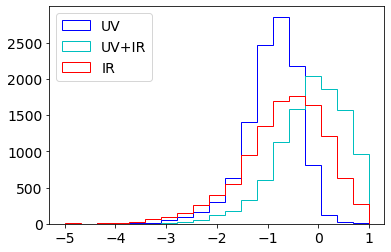

In [250]:
p.compare_sfrs()

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


[-16.41414141]


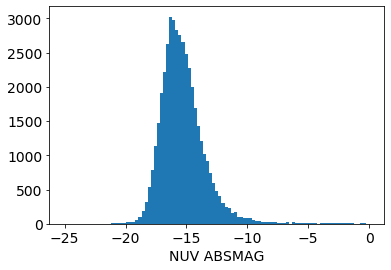

In [251]:
plt.figure()
mybins = np.linspace(-25,0,100)
flag = p.a100nsa['SERSIC_ABSMAG'][:,1] < 0
t = plt.hist(p.a100nsa['SERSIC_ABSMAG'][:,1][flag],bins=mybins)
plt.xlabel('NUV ABSMAG')
a = t[0] == max(t[0])
print(t[1][0:-1][a])

## Calculate expected peak in NUV SFR distribution ##

```
        NUV is 230 nm, according to Kennicutt & Evans
        wavelength_NUV = 230.e-9*u.m
        freq_NUV = c.c/wavelength_NUV
        
        # convert NSA NUV abs mag to nuLnu_NUV
        #flux_10pc = 10.**((22.5-self.s.ABSMAG[:,1])/2.5)
        # assume ABSMAG is in AB mag, with ZP = 3631 Jy
        flux_10pc = 3631.*10**(-1.*self.a100sdsswisensa['SERSIC_ABSMAG'][:,1]/2.5)*u.Jy
        dist = 10.*u.pc
        self.nuLnu_NUV = flux_10pc*4*np.pi*dist**2*freq_NUV
        self.logSFR_NUV_KE = np.log10(self.nuLnu_NUV.cgs.value) - 43.17
```

In [252]:
mabs = -16
wavelength_NUV = 230.e-9*u.m
freq_NUV = c.c/wavelength_NUV
flux_10pc = 3631.*10**(-1.*mabs/2.5)*u.Jy
dist = 10.*u.pc
nuLnu_NUV = flux_10pc*4*np.pi*dist**2*freq_NUV
logSFR_NUV_KE = np.log10(nuLnu_NUV.cgs.value) - 43.17
print(logSFR_NUV_KE)

-1.016969929717206


In [253]:
p.a100nsa['photFlag_gi']

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

## Plot stellar mass distribution of galaxies with NUV and W4 detections ##


Ideal SF indicator is the combination of UV+IR. 

The histograms show the distribution of WISE W4 and Galex NUV detections.  We can use the peak of the histogram as an approximate measure of the completeness relative to stellar mass.  For WISE W4, the histogram peaks at log(M)=9.6.  For GALEX NUV, the peak is at log(M) = 9.2.

NOTE: I am not imposing any SNR cuts on the NUV or W4 fluxes.



number in both a100 and with reliable sdss phot =  14658
number in both a100 and nsa =  13219


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater


number in a100 and nsa with NUV detections =  13217
number in a100 and nsa with W3 detections =  12286


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater


number in a100 and nsa with W4 detections =  11038


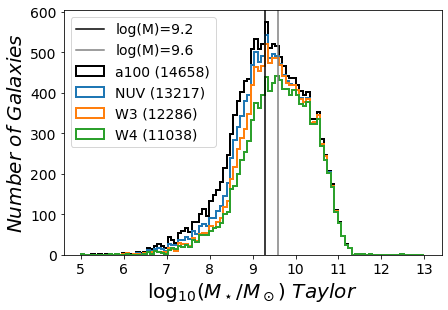

In [346]:
plt.figure(figsize=(7,5))
plt.subplots_adjust(left=.15,bottom=.2)
mybins = np.linspace(5,13,100)

baseflag = (p.a100nsa['a100Flag'] == 1) & (p.a100nsa['photFlag_gi'] == 1)
l = 'a100 ({:d})'.format(sum(baseflag))
t = plt.hist(p.a100nsa['logMstarTaylor'][baseflag],bins=mybins,histtype='step',label=l,color='k',lw=2)
#t = plt.hist(p.a100nsa['logMstarTaylor'][baseflag],bins=mybins,histtype='step',label='_nolegend_',color='w',lw=3)
print('number in both a100 and with reliable sdss phot = ',sum(baseflag))

baseflag = (p.a100nsa['a100Flag'] == 1) & (p.a100nsa['nsaFlag'] == 1) & (p.a100nsa['photFlag_gi'] == 1)
print('number in both a100 and nsa = ',sum(baseflag))
#t = plt.hist(p.a100nsa['logMstarTaylor'][baseflag],bins=mybins,histtype='step',label='a100+nsa',color='k',lw=2)
#t = plt.hist(p.a100nsa['logMstarTaylor'][baseflag],bins=mybins,histtype='step',label='_nolegend_',color='w',lw=3)

#print(t)
flag = (p.a100nsa['SERSIC_ABSMAG'][:,1] < 0) & baseflag
l = 'NUV ({:d})'.format(sum(flag))
print('number in a100 and nsa with NUV detections = ',sum(flag))
t = plt.hist(p.a100nsa['logMstarTaylor'][flag],bins=mybins,histtype='step',label=l,lw=2)

flag = (p.a100nsa['w3_mag'] > 0) & baseflag
l = 'W3 ({:d})'.format(sum(flag))
print('number in a100 and nsa with W3 detections = ',sum(flag))
t = plt.hist(p.a100nsa['logMstarTaylor'][flag],bins=mybins,histtype='step',label=l,lw=2)

flag = (p.a100nsa['w4_mag'] > 0) & baseflag
l = 'W4 ({:d})'.format(sum(flag))
print('number in a100 and nsa with W4 detections = ',sum(flag))
t = plt.hist(p.a100nsa['logMstarTaylor'][flag],bins=mybins,histtype='step',label=l,lw=2)



plt.axvline(9.3,color='k',label='log(M)=9.2')
plt.axvline(9.6,label='log(M)=9.6',color='.5')
plt.legend(loc='upper left')
plt.xlabel('$\log_{10} (M_\star/M_\odot) \ Taylor$',fontsize=20)
plt.ylabel('$Number \ of \ Galaxies$',fontsize=20)

plt.savefig(homedir+'/research/APPSS/plots/NUV-IR-hist.pdf')
plt.savefig(homedir+'/research/APPSS/plots/NUV-IR-hist.png')

## Distribution of UV and IR SFRs ##

I use  Kennicutt & Evans relations to calculate the SFR from W4, NUV, and W4+NUV.

The histogram below shows all galaxies in a100 AND NSA AND photflag_gi ==1
- total number = 13219
- NUV detections = 13217
- W4 detections = 11038

GALEX is better at detecting low SFRs, and WISE is better at detecting highest SFRs.  This is expected.  



sum of baseflag =  13219
number with NUV detections =  13217
number in UV+IR hist =  13215.0
number in UV hist =  13207.0
number with W4 detections =  11038
number in IR hist =  11038.0


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less


number of a100 with W4 detections =  12273
number of a100 with NUV detections =  13639


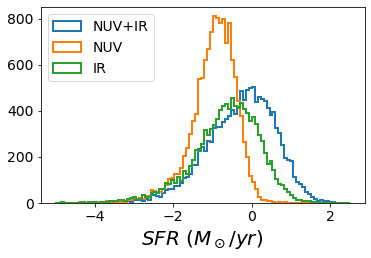

In [332]:

plt.figure(figsize=(6,4))
plt.subplots_adjust(left=.15,bottom=.2)
mybins = np.linspace(-5,2.5,100)
baseflag = (p.a100nsa['a100Flag'] == 1) & (p.a100nsa['nsaFlag'] == 1) & (p.a100nsa['photFlag_gi'] == 1)
print('sum of baseflag = ',sum(baseflag))
flaguv = (p.a100nsa['SERSIC_ABSMAG'][:,1] < 0) & baseflag
print('number with NUV detections = ',sum(flaguv))
t = plt.hist(p.a100nsa['logSFR_NUVIR_KE'][flaguv],bins=mybins,histtype='step',label='NUV+IR',lw=2)
print('number in UV+IR hist = ',sum(t[0]))



t = plt.hist(p.a100nsa['logSFR_NUV_KE'][flaguv],bins=mybins,histtype='step',label='NUV',lw=2)
print('number in UV hist = ',sum(t[0]))

flag = (p.a100nsa['w4_mag'] > 0) & baseflag
print('number with W4 detections = ',sum(flag))
t = plt.hist(p.a100nsa['logSFR22_KE'][flag],bins=mybins,histtype='step',label='IR',lw=2)
print('number in IR hist = ',sum(t[0]))
plt.legend(loc='upper left')
plt.xlabel('$SFR \ (M_\odot/yr)$',fontsize=20)

flag = (p.a100nsa['w4_mag'] > 0) & (p.a100nsa['a100Flag'] == 1)
print('number of a100 with W4 detections = ',sum(flag))

flag = (p.a100nsa['SERSIC_ABSMAG'][:,1] < 0) & (p.a100nsa['a100Flag'] == 1)
print('number of a100 with NUV detections = ',sum(flag))

plt.savefig(homedir+'/research/APPSS/plots/NUV-IR-SFR-hist.pdf')
plt.savefig(homedir+'/research/APPSS/plots/NUV-IR-SFR-hist.png')

## How many in a100 with W4 detection, but not in NSA ##

In [267]:
baseflag = (p.a100nsa['a100Flag'] == 1) & (p.a100nsa['nsaFlag'] == 0) #& (p.a100nsa['photFlag_gi'] == 1)
flag = (p.a100nsa['w4_mag'] > 0) & baseflag
print(sum(flag))

1123


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


## show how SFR_IR/SFR(UV+IR) changes with stellar mass ##

- NUV_corrected vs SFR_IR.
- Still need to understand offset.  Could be adjustment needed for using 22um flux in 24um SFR conversion.
- GALEX is better at detecting low SFRs, and WISE is better at detecting highest SFRs.  This is expected.  
- Using IR only misses SF in lower-mass galaxies.


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


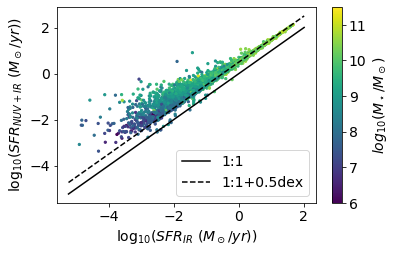

In [334]:
baseflag = (p.a100nsa['a100Flag'] == 1) & (p.a100nsa['nsaFlag'] == 1)
flag = (p.a100nsa['w4_mag'] > 0) & (p.a100nsa['SERSIC_ABSMAG'][:,1] < 0) & baseflag

ir = p.a100nsa['logSFR22_KE'][flag]
all = p.a100nsa['logSFR_NUVIR_KE'][flag]
frac = p.a100nsa['logSFR22_KE'][flag]/p.a100nsa['logSFR_NUVIR_KE'][flag]
mass = p.a100nsa['logMstarTaylor'][flag]

plt.figure(figsize=(6,4))
plt.subplots_adjust(left=.15,bottom=.2)
#plt.plot(mass,frac,'b.')
plt.scatter(ir,all,c=mass,s=5,vmin=6,vmax=11.5)
#plt.ylim(0,5)
x1,x2 = plt.xlim()
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'k-',label='1:1')
plt.plot(xl,xl+.5,'k--',label='1:1+0.5dex')
plt.xlabel('$ \log_{10}(SFR_{IR} \  (M_\odot/yr))$')
plt.ylabel('$ \log_{10}(SFR_{NUV+IR} \  (M_\odot/yr))$')
plt.legend(loc='lower right')
plt.colorbar(label='$log_{10}(M_\star/M_\odot)$')

plt.savefig(homedir+'/research/APPSS/plots/NUV-IR-SFR-comparison.pdf')
plt.savefig(homedir+'/research/APPSS/plots/NUV-IR-SFR-comparison.png')
#plt.figure()
#plt.hist(frac)

# Need to match a100+nsa catalog with GSWLC #

- can then use GSWLC SFR and stellar mass to calibrate 

/home/rfinn/github/APPSS/a100sdss.py:856: RuntimeWarning: invalid value encountered in greater
  flag = (self.cat['logSFR'] > -99) & (self.cat['w1_mag'] > 0)
/home/rfinn/github/APPSS/a100sdss.py:874: RuntimeWarning: invalid value encountered in greater
  flag2 = flag & (x > 8) & (x < 12) & (self.cat[ycols[i]] > 8) & (self.cat[ycols[i]] < 12)
/home/rfinn/github/APPSS/a100sdss.py:874: RuntimeWarning: invalid value encountered in less
  flag2 = flag & (x > 8) & (x < 12) & (self.cat[ycols[i]] > 8) & (self.cat[ycols[i]] < 12)
/home/rfinn/github/APPSS/a100sdss.py:874: RuntimeWarning: invalid value encountered in greater
  flag2 = flag & (x > 8) & (x < 12) & (self.cat[ycols[i]] > 8) & (self.cat[ycols[i]] < 12)
/home/rfinn/github/APPSS/a100sdss.py:874: RuntimeWarning: invalid value encountered in less
  flag2 = flag & (x > 8) & (x < 12) & (self.cat[ycols[i]] > 8) & (self.cat[ycols[i]] < 12)
/home/rfinn/github/APPSS/a100sdss.py:874: RuntimeWarning: invalid value encountered in greater
  flag2 =

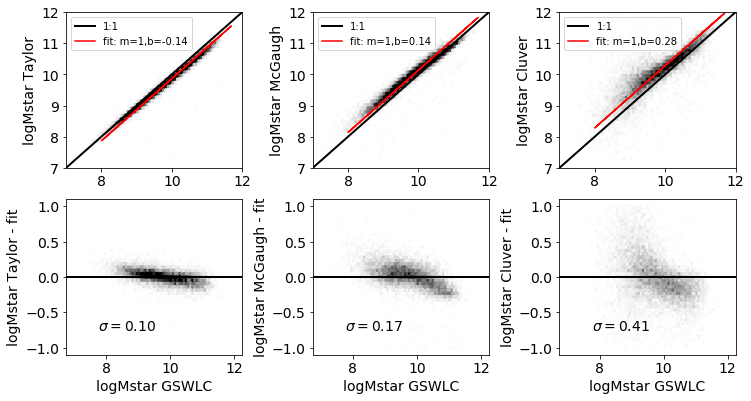

In [519]:
%run ~/github/APPSS/a100sdss.py
fp.compare_mstar()

/home/rfinn/github/APPSS/a100sdss.py:903: RuntimeWarning: invalid value encountered in greater
  flag = (self.cat['logSFR'] > -99) & (self.cat['w1_mag'] > 0)
/home/rfinn/github/APPSS/a100sdss.py:925: RuntimeWarning: invalid value encountered in greater
  flag2 = flag & (x > 8) & (x < 12) & (y > 8) & (y < 12)
/home/rfinn/github/APPSS/a100sdss.py:925: RuntimeWarning: invalid value encountered in less
  flag2 = flag & (x > 8) & (x < 12) & (y > 8) & (y < 12)
/home/rfinn/github/APPSS/a100sdss.py:925: RuntimeWarning: invalid value encountered in greater
  flag2 = flag & (x > 8) & (x < 12) & (y > 8) & (y < 12)
/home/rfinn/github/APPSS/a100sdss.py:925: RuntimeWarning: invalid value encountered in less
  flag2 = flag & (x > 8) & (x < 12) & (y > 8) & (y < 12)
/home/rfinn/github/APPSS/a100sdss.py:925: RuntimeWarning: invalid value encountered in greater
  flag2 = flag & (x > 8) & (x < 12) & (y > 8) & (y < 12)
/home/rfinn/github/APPSS/a100sdss.py:925: RuntimeWarning: invalid value encountered in l

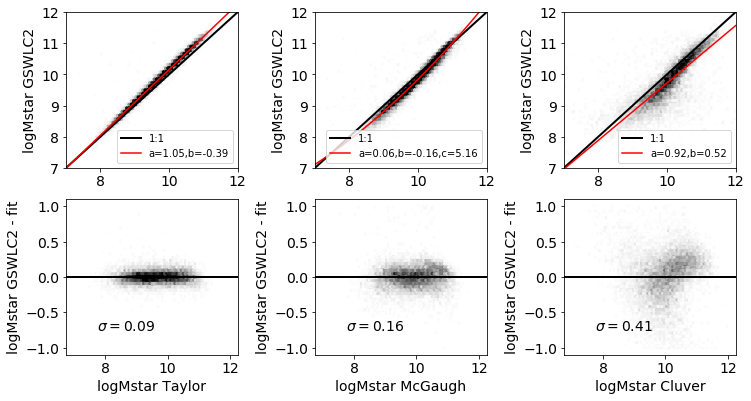

In [523]:
%run ~/github/APPSS/a100sdss.py
fp.fit_mstar()

Fitting WISE-based masses to Taylor stellar mass.  This is 

/home/rfinn/github/APPSS/a100sdss.py:957: RuntimeWarning: invalid value encountered in greater
  flag =  (self.cat['w1_mag'] > 0)
/home/rfinn/github/APPSS/a100sdss.py:980: RuntimeWarning: invalid value encountered in greater
  flag2 = flag & (x > 8) & (x < 12) & (y > 8) & (y < 12)
/home/rfinn/github/APPSS/a100sdss.py:980: RuntimeWarning: invalid value encountered in less
  flag2 = flag & (x > 8) & (x < 12) & (y > 8) & (y < 12)
/home/rfinn/github/APPSS/a100sdss.py:980: RuntimeWarning: invalid value encountered in greater
  flag2 = flag & (x > 8) & (x < 12) & (y > 8) & (y < 12)
/home/rfinn/github/APPSS/a100sdss.py:980: RuntimeWarning: invalid value encountered in less
  flag2 = flag & (x > 8) & (x < 12) & (y > 8) & (y < 12)


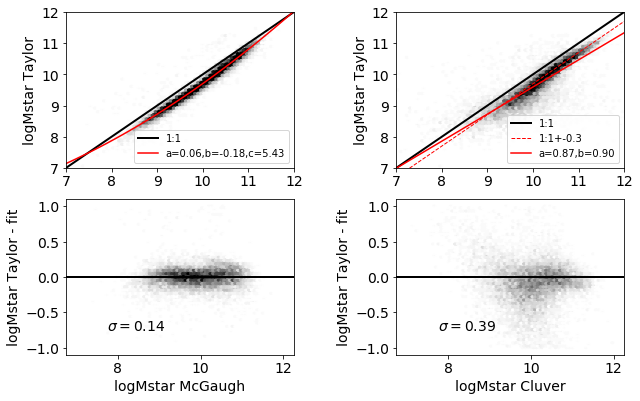

In [524]:
%run ~/github/APPSS/a100sdss.py
fp.fit2_mstar_taylor()

### Comparing SFRs ###

/home/rfinn/github/APPSS/a100sdss.py:1016: RuntimeWarning: invalid value encountered in greater
  flag = (self.cat['logSFR'] > -99) & (self.cat['w4_mag'] > 0)


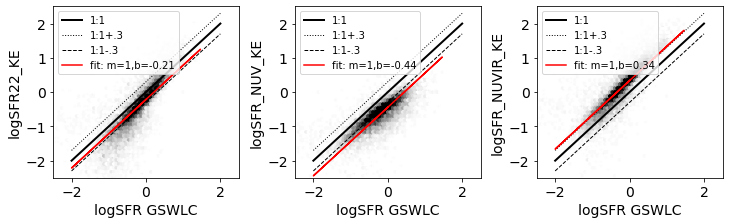

In [525]:
%run ~/github/APPSS/a100sdss.py
fp.compare_sfr()

/home/rfinn/github/APPSS/a100sdss.py:1054: RuntimeWarning: invalid value encountered in greater
  flag = (self.cat['logSFR'] > -99) & (self.cat['w4_mag'] > 0)& (self.cat['SERSIC_ABSMAG'][:,1] < 0)


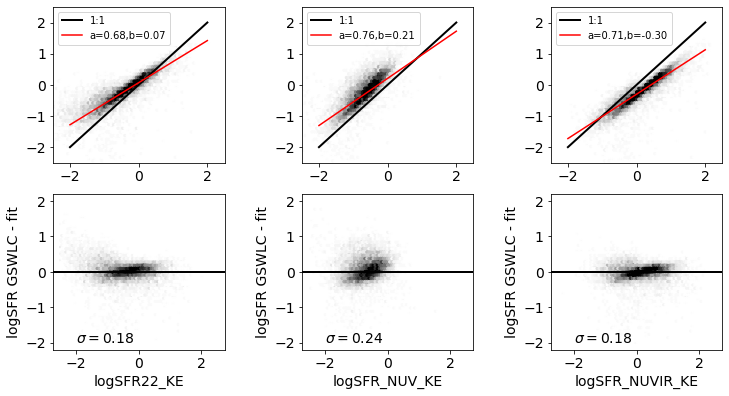

In [558]:
%run ~/github/APPSS/a100sdss.py
fp.fit_sfr()

In [540]:
np.max(fp.cat.SERSIC_ABSMAG[:,1])

0.0

- what fraction of galaxies have UV and WISE W4 detections, as a function of stellar mass (for those w/Taylor stellar mass, so in the sdssphot sample)

- what fraction of galaxies (as a function of stellar mass) that have W4 detections are in GSWLC.  If the overlap is significant, meaning all galaxies with W4 detections are in GSWLC2, then we don't need to recalibrate the stellar mass based on wise alone.

In [526]:
fp.cat.columns

ColDefs(
    name = 'AGC'; format = 'K'; null = 999999
    name = 'Name'; format = '8A'
    name = 'OrigSrcName'; format = '26A'
    name = 'HISrcName'; format = '17A'
    name = 'RAdeg_HI'; format = 'D'
    name = 'DECdeg_HI'; format = 'D'
    name = 'RAdeg_OC'; format = 'D'
    name = 'DECdeg_OC'; format = 'D'
    name = 'RAdeg_Use'; format = 'D'
    name = 'DECdeg_Use'; format = 'D'
    name = 'Vhelio'; format = 'K'; null = 999999
    name = 'sigV'; format = 'K'; null = 999999
    name = 'W50'; format = 'K'; null = 999999
    name = 'sigWtot'; format = 'K'; null = 999999
    name = 'sigWstat'; format = 'K'; null = 999999
    name = 'W20'; format = 'K'; null = 999999
    name = 'HIflux'; format = 'D'
    name = 'sigflux'; format = 'D'
    name = 'SNR'; format = 'D'
    name = 'RMS'; format = 'D'
    name = 'Dist_1'; format = 'D'
    name = 'sigdist'; format = 'D'
    name = 'logMH'; format = 'D'
    name = 'siglogMH'; format = 'D'
    name = 'HIcode'; format = 'K'; null = 999999
    

4400


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


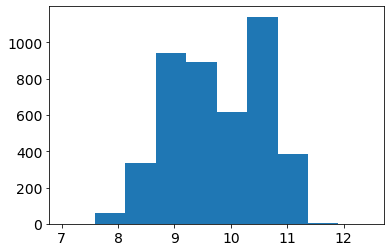

In [534]:
# flag_midir = 0; no IR detection
# = 1 for 12um detection
# = 2 for 22um detection
gswlc22 = (fp.cat['flag_midir'] == 2)
unwise22 = fp.cat['w4_mag'] > 0

# number that have unwise22 but not gswlc22
print(np.sum(unwise22 & ~gswlc22))

# plot histogram of stellar masses

plt.figure()
mybins = np.linspace(7.5,12,20)
t1 = plt.hist(fp.cat['logMstarTaylor_1'][unwise22 & ~gswlc22])
#tests = [0,1,2]
#for t in tests:
#    print(np.sum(fp.cat['flag_midir'] == t))

In [532]:
fp.cat['photFlag_gi']

KeyError: "Key 'photFlag_gi' does not exist."